In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

In [27]:
import os
# os.listdir('/kaggle/input/advertising-dataset')
data_path = '/kaggle/input/advertising-dataset/advertising.csv'
df = pd.read_csv(data_path)
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [28]:
df.info()
# No null value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


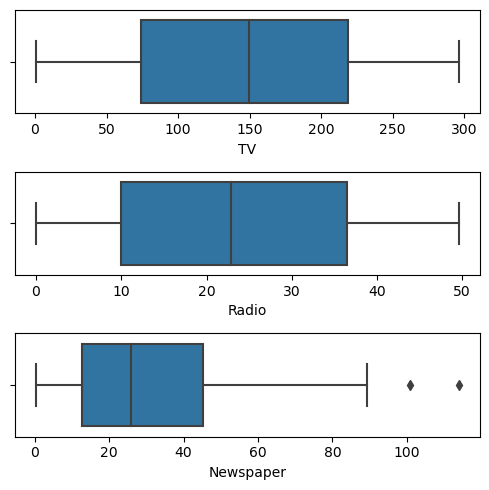

In [30]:
fig,axs = plt.subplots(3,figsize=(5,5))
sns.boxplot(x=df["TV"],ax = axs[0])
sns.boxplot(x=df["Radio"],ax = axs[1])
sns.boxplot(x=df["Newspaper"],ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Sales'>

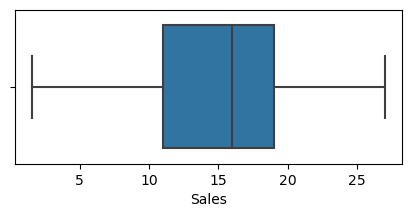

In [31]:
fig,ax = plt.subplots(1,figsize=(5,2))
# fig,axs = plt.subplots(3,figsize=(5,5))
sns.boxplot(x= df["Sales"],ax=ax)
 

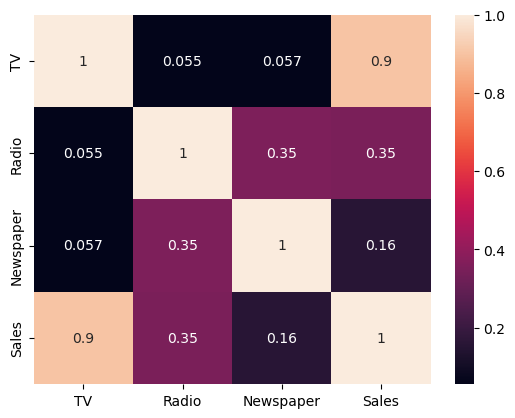

In [32]:
ax = sns.heatmap(df.corr(),annot = True)

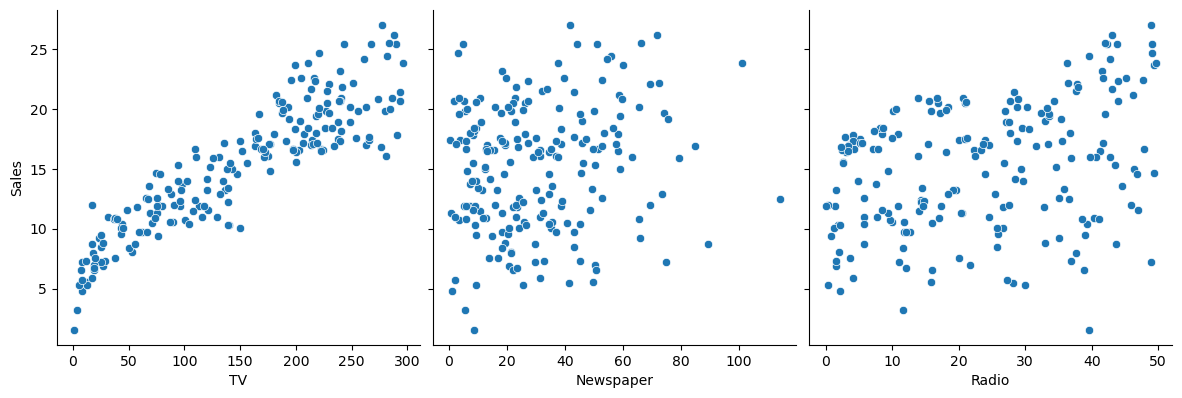

In [33]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [37]:
x = df['TV']
y = df['Sales']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 100)

In [44]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

In [52]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [47]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        12:45:57   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance

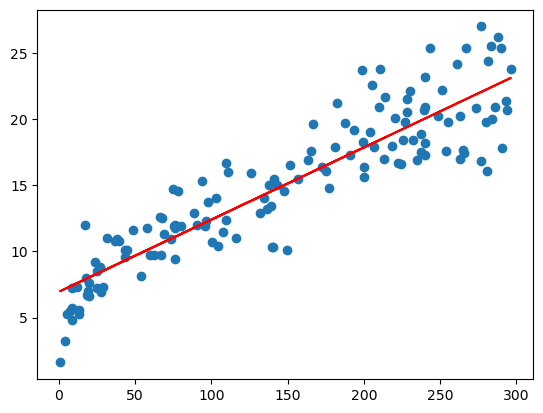

In [68]:
plt.scatter(x_train,y_train)
plt.plot(x_train, lr.params.const + lr.params.TV*x_train, 'r')


In [73]:
y_hat = lr.predict(x_train_sm)
res = y_train-y_hat

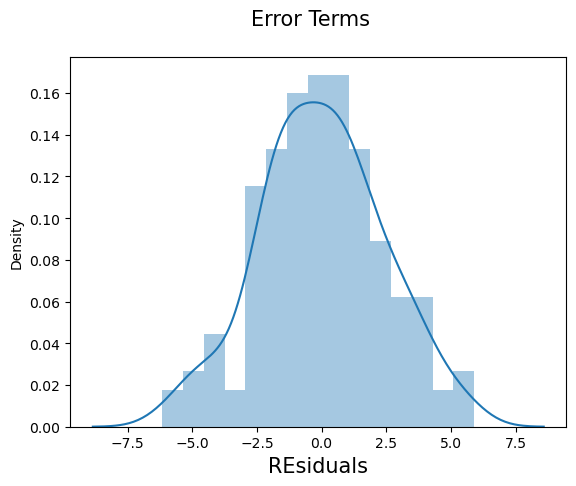

In [83]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('REsiduals', fontsize = 15)         # X-label
plt.show()

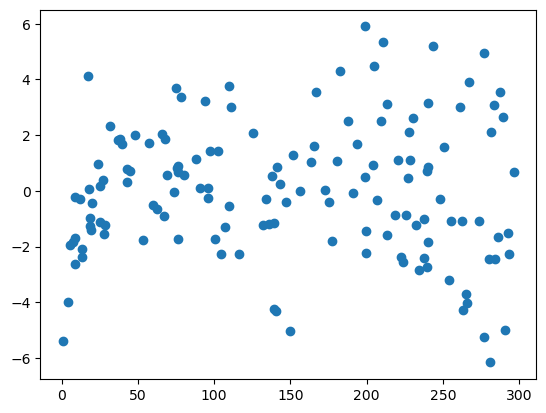

In [84]:
plt.scatter(x_train,res)

the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

Test_Set


In [86]:
x_test_sm = sm.add_constant(x_test)
y_test_hat = lr.predict(x_test_sm)

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
np.sqrt(mean_squared_error(y_test, y_test_hat))

2.019296008966232

In [91]:
r_squared = r2_score(y_test, y_test_hat)
r_squared

0.792103160124566

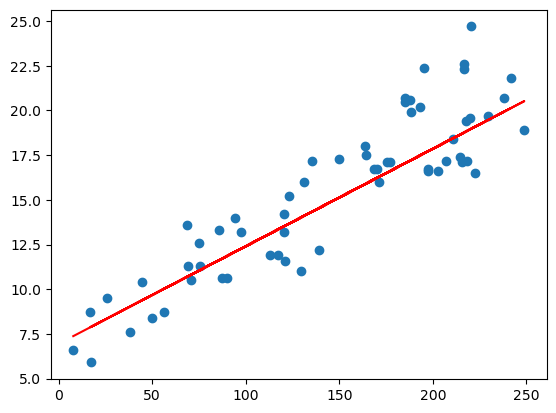

In [95]:
plt.scatter(x_test, y_test)
plt.plot(x_test, lr.params.const + lr.params.TV * x_test, 'r')
plt.show()